# Machine Learning Assignment

In [73]:
#Various modules will need to be imported. Run this cell so that all necessary modules are imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

In [74]:
#This cell will load the data that we will be using. Make sure the file is
#in the working directory, otherwise you will need to write the filepath 

ar = pd.read_csv('arrhythmia.data')
ar.head(20)

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
5,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
6,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
7,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
8,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10
9,62,0,170,72,102,135,401,156,83,72,...,-0.5,9.0,-2.0,0.0,0.0,0.8,0.9,12.3,19.3,3


In [75]:
#This cell slices the dataset so that we will work with 2 columns of data for simplicity's sake

cols = [0,6] #Column indexes to be used

ar2 = ar[ar.columns[cols]]

print(ar2)

     75  371
0    56  401
1    54  386
2    55  380
3    75  360
4    13  321
..   ..  ...
446  53  382
447  37  361
448  36  365
449  32  386
450  78  364

[451 rows x 2 columns]


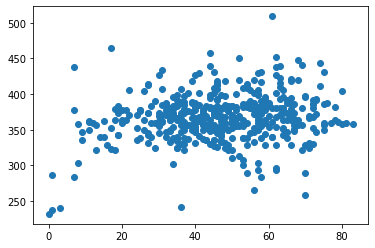

In [76]:
#A standard scatterplot of the sliced dataset

plt.scatter(ar2['75'],ar2['371']) #Create scatterplot using the 2 columns
plt.show()

In [77]:
#For some preprocessing, a min max scaler is used so that clusters may be more
#accurately grouped. This will scale the data so that it is between 0 and 1.0.
#Note: This turns the data into a numpy array

scaler = MinMaxScaler() #Make a MinMaxScaler object

#Scales the sliced dataset and returns the dataset with scaled data between 0 and 1.0
scaler.fit(ar2) 
ar2_scaled = scaler.transform(ar2)

print(ar2_scaled)

[[0.6746988  0.6101083 ]
 [0.65060241 0.55595668]
 [0.6626506  0.53429603]
 [0.90361446 0.46209386]
 [0.15662651 0.32129964]
 [0.48192771 0.5234657 ]
 [0.59036145 0.5198556 ]
 [0.53012048 0.44043321]
 [0.60240964 0.54512635]
 [0.74698795 0.6101083 ]
 [0.54216867 0.50902527]
 [0.65060241 0.54151625]
 [0.36144578 0.44404332]
 [0.53012048 0.60288809]
 [0.56626506 0.42599278]
 [0.56626506 0.41516245]
 [0.55421687 0.4368231 ]
 [0.87951807 0.57761733]
 [0.68674699 0.60288809]
 [0.3373494  0.54512635]
 [0.54216867 0.37545126]
 [0.43373494 0.4765343 ]
 [0.68674699 0.62815884]
 [0.48192771 0.5631769 ]
 [0.53012048 0.54151625]
 [0.40963855 0.50902527]
 [0.37349398 0.63176895]
 [0.6746988  0.67870036]
 [0.61445783 0.60649819]
 [0.63855422 0.63537906]
 [0.69879518 0.38628159]
 [0.60240964 0.4368231 ]
 [0.62650602 0.49097473]
 [0.8313253  0.45126354]
 [0.53012048 0.45126354]
 [0.60240964 0.48375451]
 [0.42168675 0.55234657]
 [0.74698795 0.44043321]
 [0.54216867 0.6101083 ]
 [0.51807229 0.54512635]


In [78]:
#This will create a KMeans object with the specificed number of clusters to be 4
#Based off the previous scatterplot, it's difficult to determine the optimal amount
#of clusters to use, so we will use the number 4 and see what the results are

km_original = KMeans(n_clusters=4)

In [79]:
#The fit and predict algorithm will be run here. Here it will predict 
#what cluster that each sample from the data will be in. Returning the object will give
#you an array with numbers 0 to 3. Those numbers represent the 4 clusters and what 
#cluster the sample has been assigned to. ie the number 3 in the first index means the 
#first sample data belongs to cluster 3.

y_predicted_original = km_original.fit_predict(ar2_scaled)
print(y_predicted_original)

[3 3 3 3 0 2 1 1 1 3 2 3 2 2 1 1 1 3 3 2 1 2 3 2 2 2 2 3 3 3 1 1 1 3 1 1 2
 3 2 2 2 2 2 2 3 1 2 2 2 3 2 2 0 1 3 2 2 2 2 0 2 2 2 2 2 3 0 2 3 2 2 2 2 2
 2 2 2 3 3 2 1 3 1 3 3 0 2 3 3 3 3 3 1 0 3 2 2 3 1 1 2 0 2 2 3 2 3 0 1 3 2
 2 0 2 2 3 0 0 3 3 1 3 3 2 2 3 1 3 2 1 2 2 2 2 2 2 1 2 1 2 0 2 2 2 2 0 2 2
 0 2 2 2 2 2 2 1 3 3 2 2 1 3 0 2 2 3 0 3 1 2 1 2 3 3 3 3 0 3 1 3 0 2 1 3 1
 1 3 2 3 1 1 3 2 2 0 0 2 0 3 3 3 1 2 2 2 1 3 2 1 0 0 3 1 1 2 2 3 1 3 1 2 3
 3 2 3 2 2 2 1 3 3 0 3 2 1 1 2 1 2 1 1 2 1 3 3 1 1 1 1 0 3 1 3 1 3 1 2 1 1
 2 2 2 2 2 2 1 1 2 1 3 2 3 3 3 3 2 3 1 2 2 1 1 2 3 3 2 2 3 1 3 2 2 3 1 2 3
 0 0 1 1 3 3 3 2 0 1 1 1 2 1 3 3 3 3 1 0 1 1 2 0 2 3 1 2 2 1 3 3 1 3 3 2 2
 0 2 2 2 2 1 1 2 1 3 2 2 0 3 1 3 3 1 1 0 1 1 1 1 2 1 3 2 1 3 2 2 1 3 3 2 3
 2 1 3 0 3 3 1 3 0 3 1 2 1 2 3 3 1 2 1 3 2 1 0 3 3 1 2 1 3 3 0 3 0 3 0 3 2
 3 3 3 3 2 1 3 2 0 3 1 2 1 3 2 1 0 2 2 3 3 0 0 2 0 1 0 2 2 2 2 2 2 2 3 2 0
 2 0 3 2 2 2 3]


In [80]:
#This cell is inserting the cluster data array from the fit and predict
#algorithm into the array. The array is then converted into a pandas
#dataframe with named columns

ar3 = np.insert(ar2_scaled, 2, y_predicted_original, axis=1)


pd_ar3 = pd.DataFrame(ar3, columns = ['75','371','cluster'])
print(pd_ar3)

           75       371  cluster
0    0.674699  0.610108      3.0
1    0.650602  0.555957      3.0
2    0.662651  0.534296      3.0
3    0.903614  0.462094      3.0
4    0.156627  0.321300      0.0
..        ...       ...      ...
446  0.638554  0.541516      3.0
447  0.445783  0.465704      2.0
448  0.433735  0.480144      2.0
449  0.385542  0.555957      2.0
450  0.939759  0.476534      3.0

[451 rows x 3 columns]


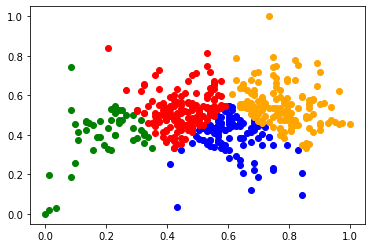

In [81]:
#A scatterplot is made with assigned clusters
#Four dataframes are made, each representing a different
#clusters and color coded 

#The four created dataframes based on cluster assignment
df1 = pd_ar3[pd_ar3.cluster==0]
df2 = pd_ar3[pd_ar3.cluster==1]
df3 = pd_ar3[pd_ar3.cluster==2]
df4 = pd_ar3[pd_ar3.cluster==3]

#Inputting the scatterplot data
plt.scatter(df1['75'],df1['371'],color='green')
plt.scatter(df2['75'],df2['371'],color='blue')
plt.scatter(df3['75'],df3['371'],color='red')
plt.scatter(df4['75'],df4['371'],color='orange')
plt.show()

In [82]:
#In order to determine the optimal amount of clusters, we need to calculate the sum of least 
#square error and graph the data to use the elbow method. The following code will give us our
#calculations.

#Set a range from 1 to 9
k_rng = range(1,10)

#Create empty array to store sse values
sse = []

#For loop that creates KMeans objects and runs fit and predict algorithms for each value of k
#from 1-9. The sse value is found in "km.inertia_", which is appended to the sse array after
#each iteration
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(pd_ar3[['75','371']])
    sse.append(km.inertia_)

C:\Users\Alex Kimball\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


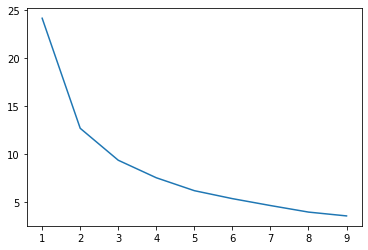

In [83]:
#Plot the graph with sse values.

plt.plot(k_rng,sse)
plt.show()

### The elbow method is one way to determine what the optimal number of clusters would be. The number would reside where the line bends, creating an elbow point of sorts. Based off the graph, the "elbow" could be either 3 or maybe even 2. Unfortunately it is not obvious what number to use based off the elbow method. Nevertheless, we will use 3 as the number of clusters and run the data through KMeans and fit and prediction once again.

In [84]:
#Repeating the same process and earlier. With the difference being 
#the number of clusters to predict being 3.

km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(ar2_scaled)

In [85]:
#Inserting the new cluster data into the data.

ar3 = np.insert(ar2_scaled, 2, y_predicted, axis=1)

pd_ar3 = pd.DataFrame(ar3, columns = ['75','371','cluster'])

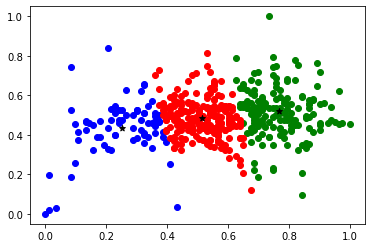

In [86]:
#A scatterplot is made with new assigned clusters
#Three dataframes are made, each representing a different
#clusters and color coded 

df1 = pd_ar3[pd_ar3.cluster==0]
df2 = pd_ar3[pd_ar3.cluster==1]
df3 = pd_ar3[pd_ar3.cluster==2]


plt.scatter(df1['75'],df1['371'],color='green')
plt.scatter(df2['75'],df2['371'],color='blue')
plt.scatter(df3['75'],df3['371'],color='red')

#Creates the centroid, or cluster centers for each of the three clusters
#They are noted by black stars
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')

plt.show()

### This is the determined optimal clustering based off the predicting algorithms. The centroids for each cluster is labeled as a black star. It's likely not the most accurate model, but with the data provided this is the result.